In [3]:
from langgraph.graph import StateGraph , START , END  
from typing import TypedDict 


In [ ]:
class BMIState(TypedDict):
    
    height:float
    weight:float
    bmi:float
    category: str


In [5]:
# here in this python function , variable 'state' gets type of State which is here is 'BMIState' and returns the 'BMIState'

def cal_bmi(state: BMIState)-> BMIState:

    height = state['height']
    weight = state['weight']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state



In [28]:
def health_result(state: BMIState) -> BMIState:

    if state['bmi'] <= 18.5:
        state['category'] = 'Underweight'
    elif 18.5 < state['bmi'] <= 24.9:
        state['category'] = 'Fit/Healthy'
    else:
        state['category'] = 'Overweight - at concerning level'

    return state


In [29]:
# Define Graph
graph = StateGraph(BMIState)

# add node
graph.add_node('cal_bmi', cal_bmi )
graph.add_node('health_result',health_result)

# add edge
graph.add_edge(START,'cal_bmi')
graph.add_edge('cal_bmi','health_result')
graph.add_edge('health_result',END)

# compile graph
workflow = graph.compile()


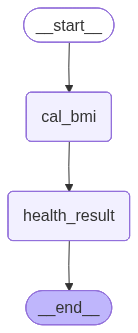

In [23]:
workflow

In [32]:
# Execute graph

initial_state = {'weight': 60 ,'height': 1.64 }

final_state = workflow.invoke(initial_state)

print(final_state)

{'height': 1.64, 'weight': 60, 'bmi': 22.31, 'category': 'Fit/Healthy'}
